# 7장 시계열 데이터를 다뤄보자



## 7-1. Numpy의 polyfit으로 회귀(regression) 분석하기
* pip install pandas_datareader
* conda install -c conda-forge fbprophet

http://landinghub.visualstudio.com/visual-cpp-build-tools

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
from datetime import datetime

path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [7]:
pinkwink_web = pd.read_csv('./data/08. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',', \
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
16. 7. 6.,876.0
16. 7. 7.,868.0
16. 7. 8.,785.0
16. 7. 9.,417.0


- 웹 트래픽

In [4]:
pinkwink_web_tmp = pd.read_csv('./data/08. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',', \
                                          index_col=0)
pinkwink_web_tmp.head()

,766
16. 7. 1.,
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
16. 7. 6.,876.0


- names : array-like, default None
   -     List of column names to use. If file contains no header row, then you
    should explicitly pass header=None.
- thousands : str, default None
   -     Thousands separator

In [6]:
pinkwink_web_tmp = pd.read_csv('./data/08. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',', \
                                          index_col=0, header=None)
pinkwink_web_tmp.head()

,1
0,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


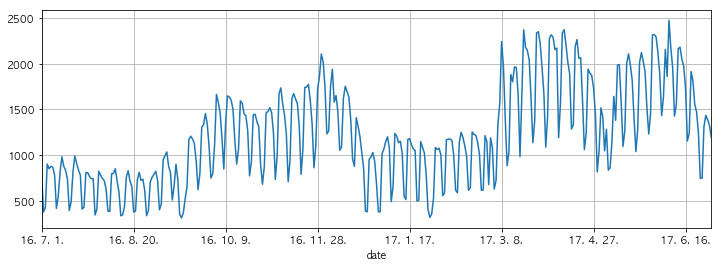

In [8]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

- 2016.7.1 ~ 2017.6.16

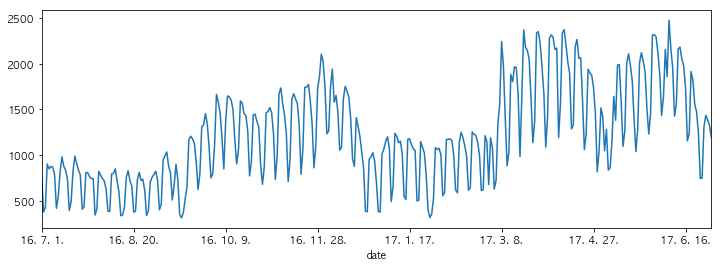

In [9]:
pinkwink_web['hit'].plot(figsize=(12,4))

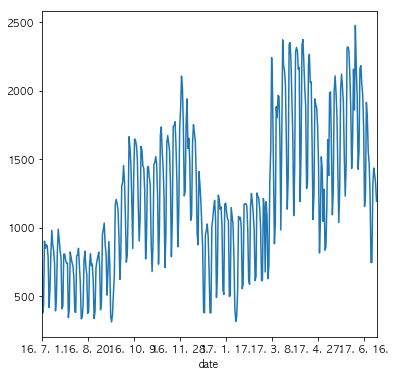

In [12]:
pinkwink_web['hit'].plot(figsize=(6,6))

- 시계열
    - 수열
    - 이미지

In [13]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

- arange([start,] stop[, step,], dtype=None)
    - Return evenly spaced values within a given interval.


In [14]:
time

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [15]:
type(pinkwink_web['hit'])

pandas.core.series.Series

In [16]:
pinkwink_web['hit'].values

array([ 766.,  377.,  427.,  902.,  850.,  876.,  868.,  785.,  417.,
        550.,  818.,  981.,  877.,  833.,  737.,  393.,  489.,  817.,
        989.,  908.,  835.,  782.,  408.,  429.,  808.,  808.,  765.,
        742.,  742.,  344.,  408.,  823.,  781.,  745.,  719.,  629.,
        386.,  382.,  795.,  799.,  850.,  717.,  595.,  335.,  346.,
        433.,  759.,  829.,  716.,  659.,  375.,  386.,  727.,  812.,
        723.,  736.,  613.,  337.,  391.,  704.,  757.,  788.,  823.,
        721.,  401.,  463.,  948.,  993., 1034.,  877.,  808.,  508.,
        669.,  899.,  732.,  352.,  312.,  369.,  522.,  655., 1170.,
       1207., 1178., 1126.,  929.,  623.,  799., 1307., 1331., 1455.,
       1342., 1090.,  749.,  797., 1117., 1665., 1579., 1461., 1188.,
        849., 1364., 1648., 1637., 1601., 1499., 1159.,  902., 1066.,
       1594., 1568., 1453., 1433., 1265.,  772.,  932., 1439., 1448.,
       1367., 1313.,  895.,  680.,  872., 1464., 1476., 1520., 1464.,
       1239.,  734.,

In [17]:
len(pinkwink_web['hit'].values)

365

In [19]:
fx

array([  0.        ,   0.36436436,   0.72872873,   1.09309309,
         1.45745746,   1.82182182,   2.18618619,   2.55055055,
         2.91491491,   3.27927928,   3.64364364,   4.00800801,
         4.37237237,   4.73673674,   5.1011011 ,   5.46546547,
         5.82982983,   6.19419419,   6.55855856,   6.92292292,
         7.28728729,   7.65165165,   8.01601602,   8.38038038,
         8.74474474,   9.10910911,   9.47347347,   9.83783784,
        10.2022022 ,  10.56656657,  10.93093093,  11.2952953 ,
        11.65965966,  12.02402402,  12.38838839,  12.75275275,
        13.11711712,  13.48148148,  13.84584585,  14.21021021,
        14.57457457,  14.93893894,  15.3033033 ,  15.66766767,
        16.03203203,  16.3963964 ,  16.76076076,  17.12512513,
        17.48948949,  17.85385385,  18.21821822,  18.58258258,
        18.94694695,  19.31131131,  19.67567568,  20.04004004,
        20.4044044 ,  20.76876877,  21.13313313,  21.4974975 ,
        21.86186186,  22.22622623,  22.59059059,  22.95

- 데이터를 잘 표현하는 모델 구하기
    - 회귀
        - 모델의 적합성 평가

In [20]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [21]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.62841018946955
429.5328046676293
330.4777307248983


** np.polyfit **
- Signature: np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
- Least squares polynomial fit.

    - Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
        to points `(x, y)`. Returns a vector of coefficients `p` that minimises
        the squared error.


----------
- x : array_like, shape (M,)
    - x-coordinates of the M sample points ``(x[i], y[i])``.
- y : array_like, shape (M,) or (M, K)
    - y-coordinates of the sample points. Several data sets of sample
    points sharing the same x-coordinates can be fitted at once by
    passing in a 2D-array that contains one dataset per column.
- deg : int
    - Degree of the fitting polynomial

** np.poly1d **
- Init signature: np.poly1d(c_or_r, r=False, variable=None)
- A one-dimensional polynomial class.
- c_or_r : array_like

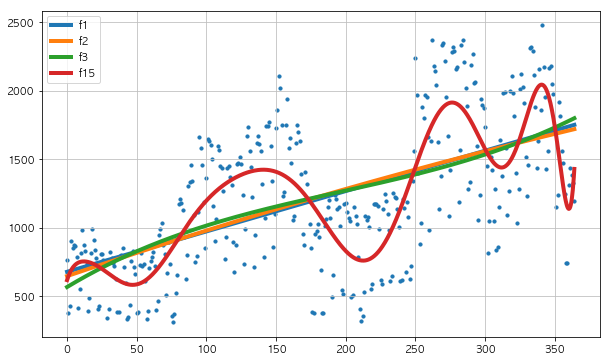

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)
# s : scalar or array_like, shape (n, ), optional
    # size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

- 과적합
    - under-

## 7-2. Prophet 모듈을 이용한 forecast 예측

In [23]:
pinkwink_web.index

Index(['16. 7. 1.', '16. 7. 2.', '16. 7. 3.', '16. 7. 4.', '16. 7. 5.',
       '16. 7. 6.', '16. 7. 7.', '16. 7. 8.', '16. 7. 9.', '16. 7. 10.',
       ...
       '17. 6. 21.', '17. 6. 22.', '17. 6. 23.', '17. 6. 24.', '17. 6. 25.',
       '17. 6. 26.', '17. 6. 27.', '17. 6. 28.', '17. 6. 29.', '17. 6. 30.'],
      dtype='object', name='date', length=365)

In [24]:
pinkwink_web['hit']

date
16. 7. 1.      766.0
16. 7. 2.      377.0
16. 7. 3.      427.0
16. 7. 4.      902.0
16. 7. 5.      850.0
16. 7. 6.      876.0
16. 7. 7.      868.0
16. 7. 8.      785.0
16. 7. 9.      417.0
16. 7. 10.     550.0
16. 7. 11.     818.0
16. 7. 12.     981.0
16. 7. 13.     877.0
16. 7. 14.     833.0
16. 7. 15.     737.0
16. 7. 16.     393.0
16. 7. 17.     489.0
16. 7. 18.     817.0
16. 7. 19.     989.0
16. 7. 20.     908.0
16. 7. 21.     835.0
16. 7. 22.     782.0
16. 7. 23.     408.0
16. 7. 24.     429.0
16. 7. 25.     808.0
16. 7. 26.     808.0
16. 7. 27.     765.0
16. 7. 28.     742.0
16. 7. 29.     742.0
16. 7. 30.     344.0
               ...  
17. 6. 1.     2118.0
17. 6. 2.     1883.0
17. 6. 3.     1433.0
17. 6. 4.     1637.0
17. 6. 5.     2158.0
17. 6. 6.     1860.0
17. 6. 7.     2477.0
17. 6. 8.     2172.0
17. 6. 9.     1958.0
17. 6. 10.    1427.0
17. 6. 11.    1558.0
17. 6. 12.    2164.0
17. 6. 13.    2183.0
17. 6. 14.    2051.0
17. 6. 15.    1975.0
17. 6. 16.    1734.0
17. 6. 1

In [25]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})

In [27]:
df

,ds,y
date,,
16. 7. 1.,16. 7. 1.,766.0
16. 7. 2.,16. 7. 2.,377.0
16. 7. 3.,16. 7. 3.,427.0
16. 7. 4.,16. 7. 4.,902.0
16. 7. 5.,16. 7. 5.,850.0
16. 7. 6.,16. 7. 6.,876.0
16. 7. 7.,16. 7. 7.,868.0
16. 7. 8.,16. 7. 8.,785.0
16. 7. 9.,16. 7. 9.,417.0


In [28]:
df.reset_index(inplace=True)
df

,date,ds,y
0,16. 7. 1.,16. 7. 1.,766.0
1,16. 7. 2.,16. 7. 2.,377.0
2,16. 7. 3.,16. 7. 3.,427.0
3,16. 7. 4.,16. 7. 4.,902.0
4,16. 7. 5.,16. 7. 5.,850.0
5,16. 7. 6.,16. 7. 6.,876.0
6,16. 7. 7.,16. 7. 7.,868.0
7,16. 7. 8.,16. 7. 8.,785.0
8,16. 7. 9.,16. 7. 9.,417.0
9,16. 7. 10.,16. 7. 10.,550.0


In [29]:
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
df

,date,ds,y
0,16. 7. 1.,2016-07-01,766.0
1,16. 7. 2.,2016-07-02,377.0
2,16. 7. 3.,2016-07-03,427.0
3,16. 7. 4.,2016-07-04,902.0
4,16. 7. 5.,2016-07-05,850.0
5,16. 7. 6.,2016-07-06,876.0
6,16. 7. 7.,2016-07-07,868.0
7,16. 7. 8.,2016-07-08,785.0
8,16. 7. 9.,2016-07-09,417.0
9,16. 7. 10.,2016-07-10,550.0


In [30]:
del df['date']
df

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0
5,2016-07-06,876.0
6,2016-07-07,868.0
7,2016-07-08,785.0
8,2016-07-09,417.0
9,2016-07-10,550.0


In [32]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)

- Prophet(growth='linear', changepoints=None, n_changepoints=25, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000)

----------

- yearly_seasonality: Fit yearly seasonality.
    - Can be 'auto', True, False, or a number of Fourier terms to generate.
- daily_seasonality: Fit daily seasonality.
    - Can be 'auto', True, False, or a number of Fourier terms to generate.

- seasonality

In [34]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [36]:
future = m.make_future_dataframe(periods=60)
future.tail()
# periods: Int number of periods to forecast forward.

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [37]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,912.505060,710.042136,1132.656041
421,2017-08-26,497.439613,294.848888,711.821844
422,2017-08-27,630.021823,431.869856,827.250695
423,2017-08-28,1182.722824,971.135366,1400.898818
424,2017-08-29,1218.649042,1013.410859,1431.926774


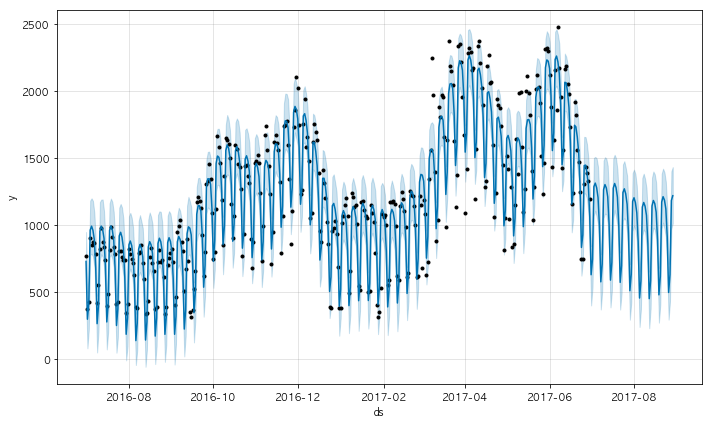

In [38]:
m.plot(forecast);

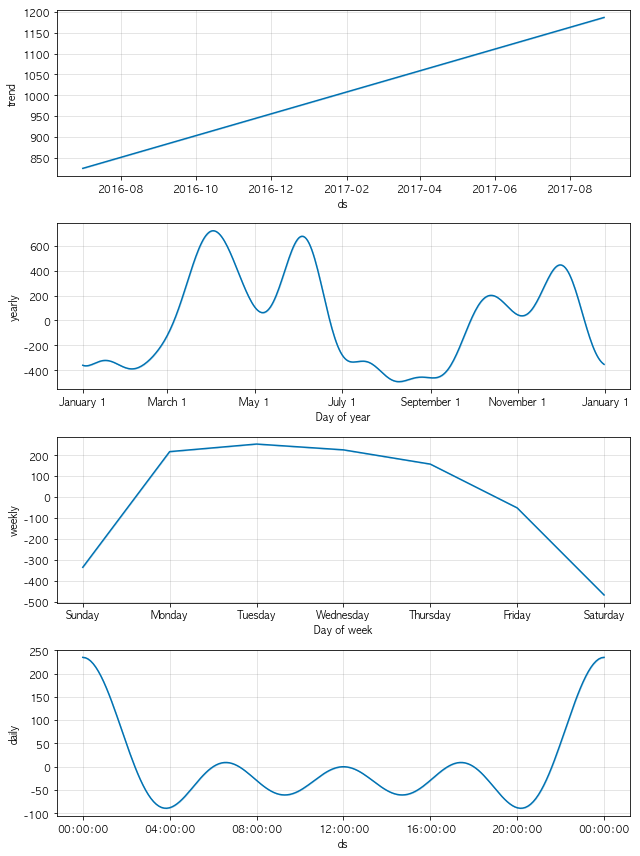

In [39]:
m.plot_components(forecast);

## 7-3. Seasonal 시계열 분석으로 주식 데이터 분석하기

In [42]:
from pandas_datareader import data
import fix_yahoo_finance as yf

yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2017-6-30' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
KIA.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,5963.754395,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,5639.200684,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,5395.779297,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,5274.072754,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,5517.486816,1076700


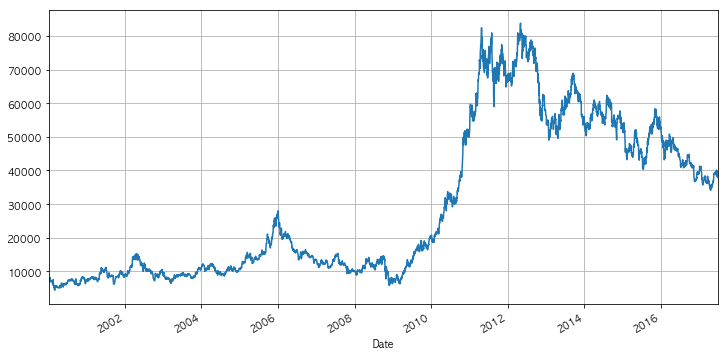

In [43]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [44]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,5963.754395,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,5639.200684,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,5395.779297,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,5274.072754,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,5517.486816,1076700
2000-01-11,7143.799805,7717.390137,7143.799805,7717.390137,6004.329590,1127200
2000-01-12,7717.390137,8447.410156,7300.229980,7508.810059,5842.046875,1606600
2000-01-13,7696.529785,7696.529785,7195.939941,7195.939941,5598.626953,702700
2000-01-14,7195.939941,7508.810059,6987.359863,7508.810059,5842.046875,843900


In [45]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-01-04,7665.240234
1,2000-01-05,7248.089844
2,2000-01-06,6935.220215
3,2000-01-07,6778.790039
4,2000-01-10,7091.649902


In [46]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [47]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4578,2017-12-25
4579,2017-12-26
4580,2017-12-27
4581,2017-12-28
4582,2017-12-29


In [48]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4578,2017-12-25,35699.306886,27933.597713,44062.906465
4579,2017-12-26,35743.889629,28197.051044,43601.887818
4580,2017-12-27,35712.929531,28116.722154,44750.548698
4581,2017-12-28,35677.765597,28106.623775,44109.112213
4582,2017-12-29,35615.004272,28211.754373,44951.571284


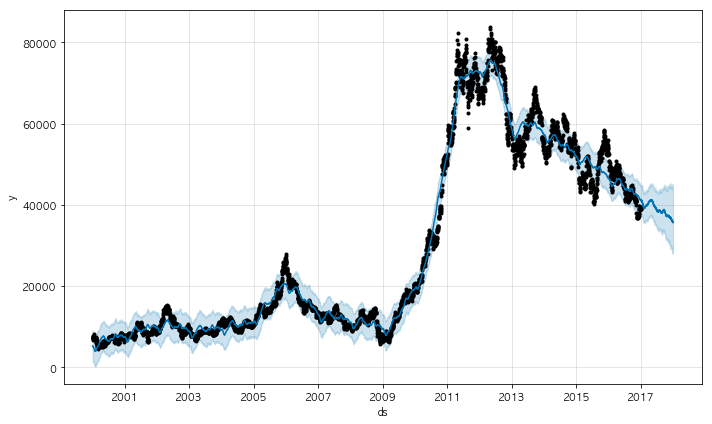

In [49]:
m.plot(forecast);

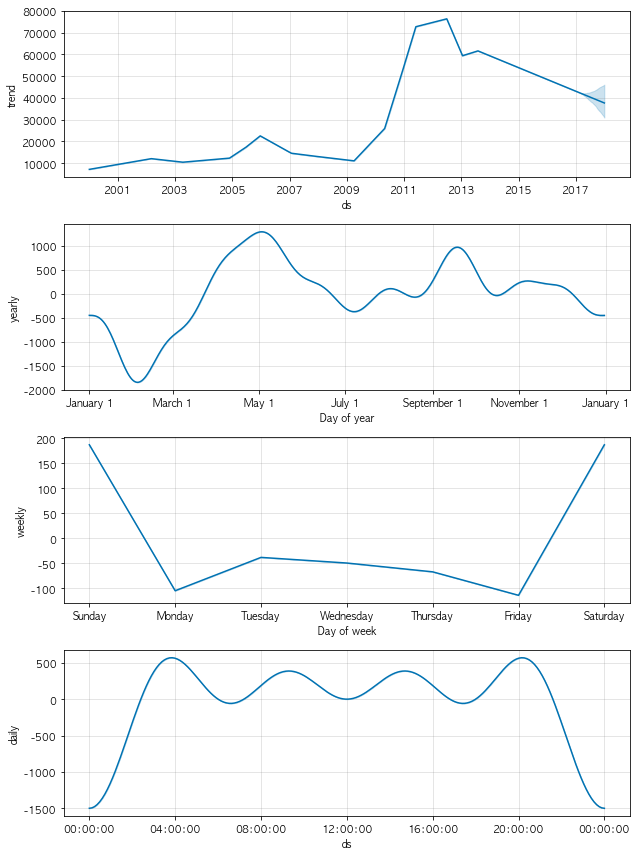

In [50]:
m.plot_components(forecast);

[*********************100%***********************]  1 of 1 downloaded


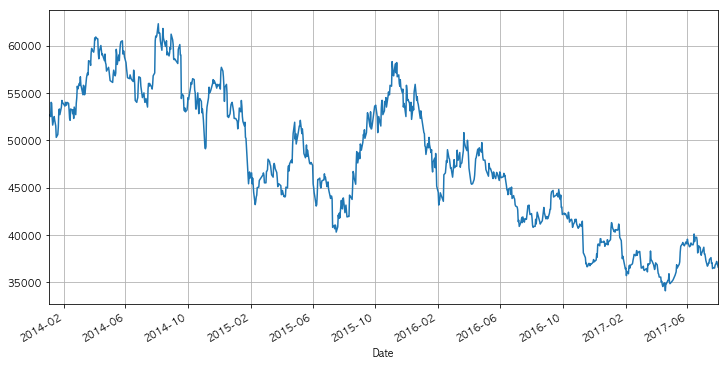

In [51]:
start_date = '2014-1-1' 
end_date = '2017-7-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

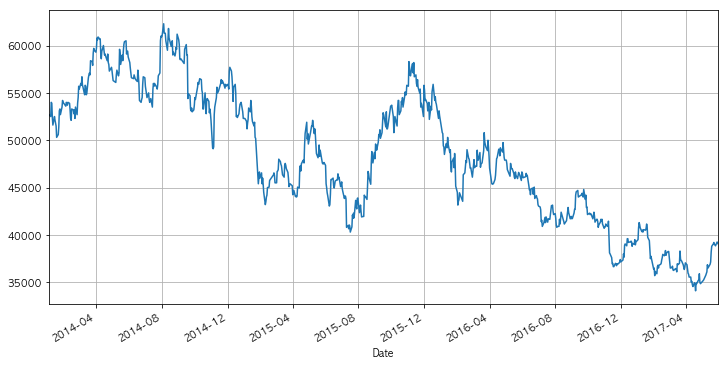

In [52]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [53]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [54]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [55]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


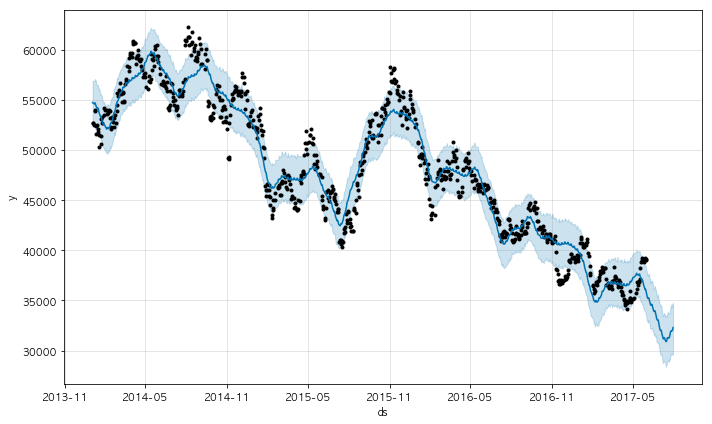

In [56]:
forecast = m.predict(future)
m.plot(forecast);

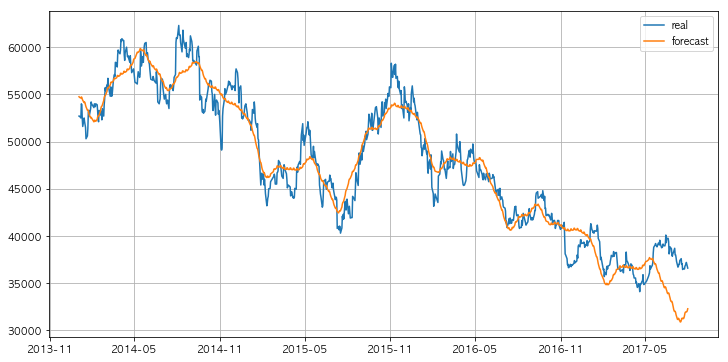

In [57]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

## 7-4 Growth Model과 Holiday Forecast

In [58]:
df = pd.read_csv('./data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [59]:
df['cap'] = 8.5

In [63]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

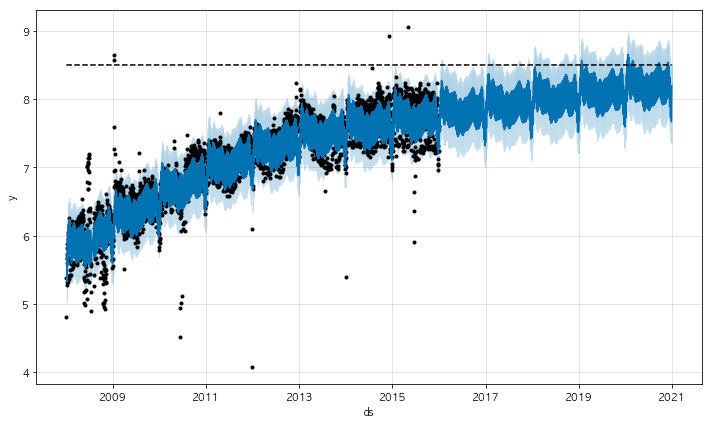

In [64]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

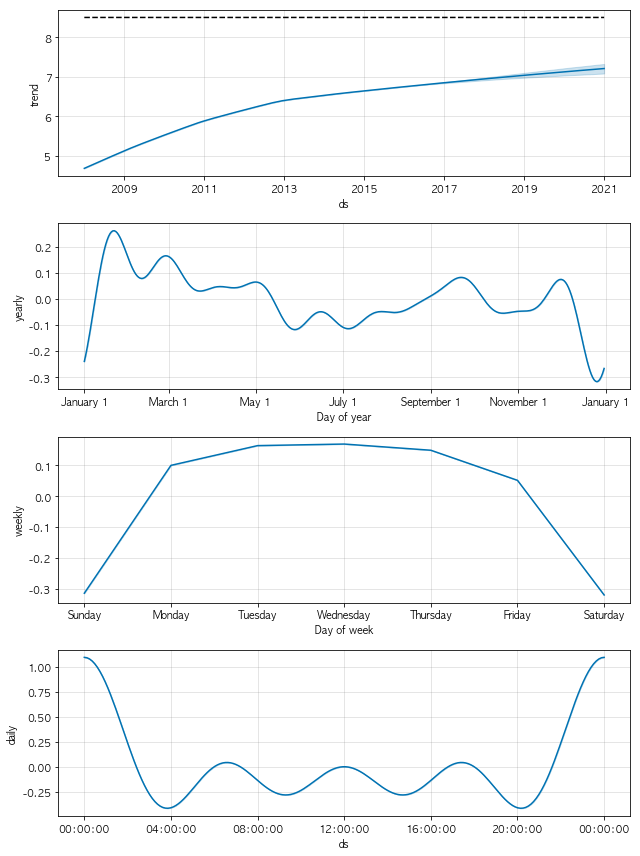

In [65]:
forecast = m.predict(future)
m.plot_components(forecast);

## holiday

In [66]:
df = pd.read_csv('./data/08. example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=366)

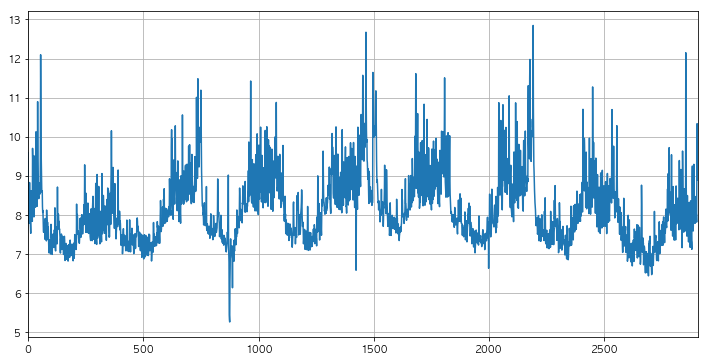

In [67]:
df.y.plot(figsize=(12,6), grid=True);

In [68]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [69]:
m = Prophet(holidays=holidays, daily_seasonality=True)
forecast = m.fit(df).predict(future)

In [70]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.225683,1.174862
2191,2014-02-03,1.901161,1.456941
2532,2015-01-11,1.225683,0.000000
2533,2015-01-12,1.901161,0.000000
2901,2016-01-17,1.225683,0.000000
2902,2016-01-18,1.901161,0.000000
2908,2016-01-24,1.225683,0.000000
2909,2016-01-25,1.901161,0.000000
2922,2016-02-07,1.225683,1.174862
2923,2016-02-08,1.901161,1.456941


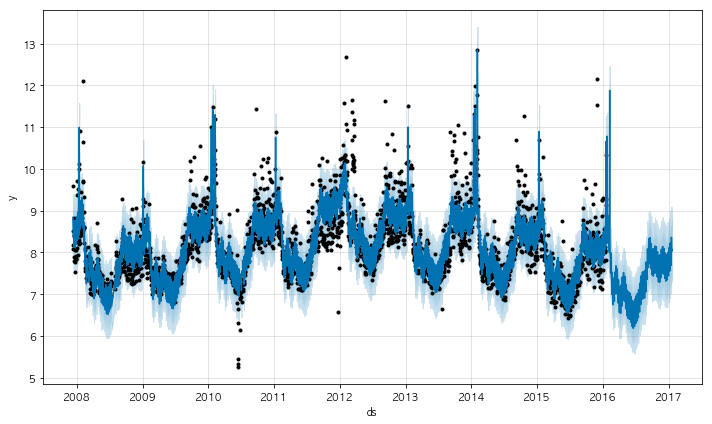

In [71]:
m.plot(forecast);

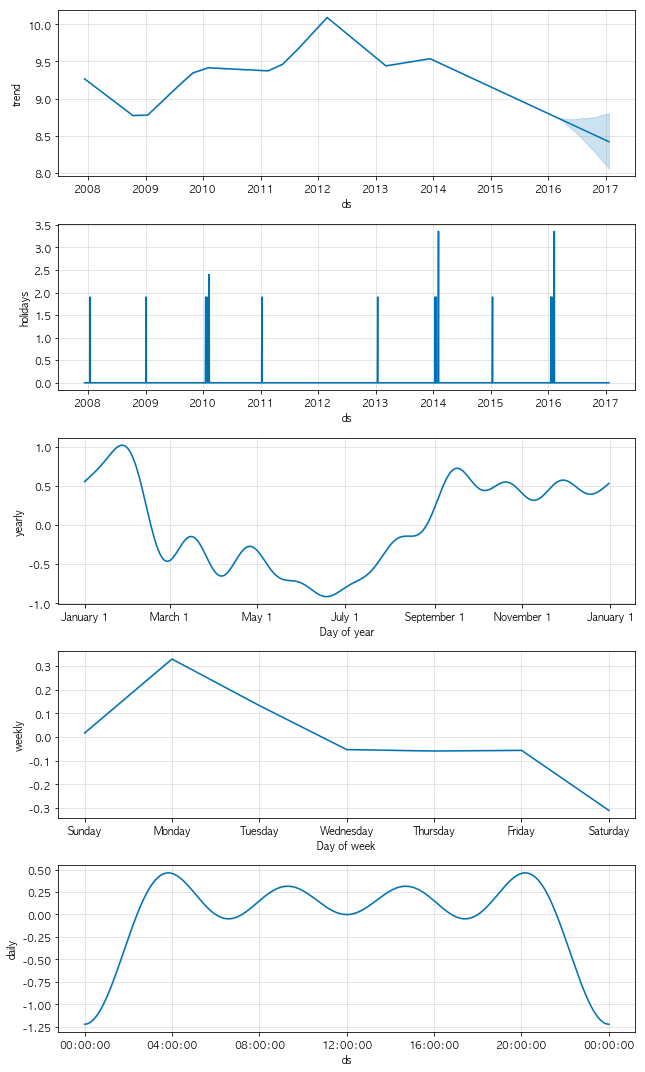

In [72]:
m.plot_components(forecast);